In [56]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D
import numpy as np
from tensorflow.keras.preprocessing import image

In [57]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [60]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [61]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/cotton_train',
                                                 target_size=  (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1929 images belonging to 4 classes.


In [62]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/cotton_test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 18 images belonging to 4 classes.


In [64]:
cnn = tf.keras.models.Sequential()

# Step 1 - Convolution
cnn.add(tf.keras.layers.Conv2D(filters=32,padding="same",kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

# Step 2 - Pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Adding a second convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Step 3 - Flattening
cnn.add(tf.keras.layers.Flatten())

cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

# Step 5 - Output Layer
cnn.add(tf.keras.layers.Dense(units=4, activation='softmax'))

In [65]:
cnn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 64, 64, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               1048704   
_________________________________________________________________
dense_5 (Dense)              (None, 4)                

In [66]:
cnn.compile(optimizer = 'adam',loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [67]:
cnn.fit(x = training_set, validation_data = test_set, epochs = 10)

Epoch 1/10
61/61 [==============================] - 20s 325ms/step - loss: 1.2125 - accuracy: 0.4505 - val_loss: 0.8668 - val_accuracy: 0.6667
Epoch 2/10
61/61 [==============================] - 17s 273ms/step - loss: 0.9310 - accuracy: 0.6454 - val_loss: 0.8366 - val_accuracy: 0.6667
Epoch 3/10
61/61 [==============================] - 17s 273ms/step - loss: 0.7800 - accuracy: 0.6978 - val_loss: 0.6750 - val_accuracy: 0.7778
Epoch 4/10
61/61 [==============================] - 16s 270ms/step - loss: 0.6619 - accuracy: 0.7486 - val_loss: 0.4709 - val_accuracy: 0.8889
Epoch 5/10
61/61 [==============================] - 17s 271ms/step - loss: 0.5760 - accuracy: 0.7771 - val_loss: 0.4344 - val_accuracy: 0.8333
Epoch 6/10
61/61 [==============================] - 16s 270ms/step - loss: 0.5316 - accuracy: 0.8035 - val_loss: 0.3084 - val_accuracy: 0.9444
Epoch 7/10
61/61 [==============================] - 17s 272ms/step - loss: 0.4845 - accuracy: 0.8227 - val_loss: 0.1441 - val_accuracy: 1.0000

In [68]:
cnn.save('/content/gdrive/My Drive/cotton_model.h5')

In [20]:

cnn.load_weights("/content/gdrive/My Drive/cotton_model.h5")

In [73]:
model_json = cnn.to_json()
with open("/content/gdrive/My Drive/model.json","w") as json_file:
  json_file.write(model_json)

In [74]:
from keras.models import model_from_json
import cv2
import matplotlib.pyplot as plt


In [45]:
def predict_(image_path):
    #Load the Model from Json File
    json_file = open('/content/gdrive/My Drive/model.json', 'r')
    model_json_c = json_file.read()
    json_file.close()
    model_c = model_from_json(model_json_c)
    #Load the weights
    model_c.load_weights("/content/gdrive/My Drive/cotton_model.h5")
    #Compile the model
    #opt = SGD(lr=1e-4, momentum=0.9)
    model_c.compile(loss="categorical_crossentropy", optimizer='adam',metrics=["accuracy"])
    #load the image you want to classify
    image = cv2.imread(image_path)
    image = cv2.resize(image, (64,64))
    #cv2.imshow(image)
    #predict the image
    preds = model_c.predict(np.expand_dims(image, axis=0))[0]
    preds = np.argmax(preds)
    plt.matshow(image)
    print (preds)
    if preds==0:
        print("Predicted image :DISEASED COTTON LEAF ")

    elif preds == 1:
      print("Predicted image :DISEASED COTTON PLANT")

    elif preds == 2:
      print("Predicted image :FRESH  COTTON LEAF")

    elif preds == 3:
      print('Predicted image :FRESH  COTTON PLANT')  
        



   

3
Predicted image :FRESH  COTTON PLANT


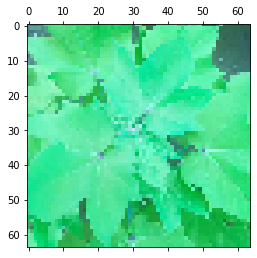

In [75]:
predict_("/content/drive/MyDrive/cotton_train/fresh cotton plant/dsd (145)_iaip.jpg")